<a href="https://colab.research.google.com/github/krishna663-wq/Neural_Networks/blob/main/ANN_for_Customer_Churning_Lab4_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [93]:
data = pd.read_csv('Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [94]:
data.shape

(10000, 14)

In [95]:

# Drop specified columns
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)


In [96]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [97]:
data.shape

(10000, 11)

In [98]:
data = pd.get_dummies(data=data,columns=['Geography','Gender'],drop_first=True)
print(data)

      CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0             619   42       2       0.00              1          1   
1             608   41       1   83807.86              1          0   
2             502   42       8  159660.80              3          1   
3             699   39       1       0.00              2          0   
4             850   43       2  125510.82              1          1   
...           ...  ...     ...        ...            ...        ...   
9995          771   39       5       0.00              2          1   
9996          516   35      10   57369.61              1          1   
9997          709   36       7       0.00              1          0   
9998          772   42       3   75075.31              2          1   
9999          792   28       4  130142.79              1          1   

      IsActiveMember  EstimatedSalary  Exited  Geography_Germany  \
0                  1        101348.88       1              False   
1          

In [99]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [100]:
data.shape

(10000, 12)

In [101]:
X = data.drop(['Exited'],axis=1)
y = data['Exited']
print(X)
y


      CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0             619   42       2       0.00              1          1   
1             608   41       1   83807.86              1          0   
2             502   42       8  159660.80              3          1   
3             699   39       1       0.00              2          0   
4             850   43       2  125510.82              1          1   
...           ...  ...     ...        ...            ...        ...   
9995          771   39       5       0.00              2          1   
9996          516   35      10   57369.61              1          1   
9997          709   36       7       0.00              1          0   
9998          772   42       3   75075.31              2          1   
9999          792   28       4  130142.79              1          1   

      IsActiveMember  EstimatedSalary  Geography_Germany  Geography_Spain  \
0                  1        101348.88              False            Fa

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [102]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 11)
(2000, 11)
(8000,)
(2000,)


In [109]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)
print(X_train_scaled)
X_test_scaled

[[ 0.35649971 -0.6557859   0.34567966 ... -0.57946723 -0.57638802
   0.91324755]
 [-0.20389777  0.29493847 -0.3483691  ...  1.72572313 -0.57638802
   0.91324755]
 [-0.96147213 -1.41636539 -0.69539349 ... -0.57946723  1.73494238
   0.91324755]
 ...
 [ 0.86500853 -0.08535128 -1.38944225 ... -0.57946723 -0.57638802
  -1.09499335]
 [ 0.15932282  0.3900109   1.03972843 ... -0.57946723 -0.57638802
   0.91324755]
 [ 0.47065475  1.15059039 -1.38944225 ...  1.72572313 -0.57638802
   0.91324755]]


array([[-0.57749609, -0.6557859 , -0.69539349, ...,  1.72572313,
        -0.57638802,  0.91324755],
       [-0.29729735,  0.3900109 , -1.38944225, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.52560743,  0.48508334, -0.3483691 , ..., -0.57946723,
         1.73494238, -1.09499335],
       ...,
       [ 0.81311987,  0.77030065,  0.69270405, ..., -0.57946723,
        -0.57638802, -1.09499335],
       [ 0.41876609, -0.94100321, -0.3483691 , ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.24540869,  0.00972116, -1.38944225, ...,  1.72572313,
        -0.57638802,  0.91324755]])

In [110]:
# transform x-train
X_train = scaler.fit_transform(X_train)
print(X_train)

[[ 0.35649971 -0.6557859   0.34567966 ... -0.57946723 -0.57638802
   0.91324755]
 [-0.20389777  0.29493847 -0.3483691  ...  1.72572313 -0.57638802
   0.91324755]
 [-0.96147213 -1.41636539 -0.69539349 ... -0.57946723  1.73494238
   0.91324755]
 ...
 [ 0.86500853 -0.08535128 -1.38944225 ... -0.57946723 -0.57638802
  -1.09499335]
 [ 0.15932282  0.3900109   1.03972843 ... -0.57946723 -0.57638802
   0.91324755]
 [ 0.47065475  1.15059039 -1.38944225 ...  1.72572313 -0.57638802
   0.91324755]]


In [105]:
X_test = scaler.transform(X_test)
print(X_test)

[[-0.57749609 -0.6557859  -0.69539349 ...  1.72572313 -0.57638802
   0.91324755]
 [-0.29729735  0.3900109  -1.38944225 ... -0.57946723 -0.57638802
   0.91324755]
 [-0.52560743  0.48508334 -0.3483691  ... -0.57946723  1.73494238
  -1.09499335]
 ...
 [ 0.81311987  0.77030065  0.69270405 ... -0.57946723 -0.57638802
  -1.09499335]
 [ 0.41876609 -0.94100321 -0.3483691  ... -0.57946723 -0.57638802
   0.91324755]
 [-0.24540869  0.00972116 -1.38944225 ...  1.72572313 -0.57638802
   0.91324755]]


In [106]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [116]:
model = Sequential()
model.add(Dense(3,activation='relu',input_dim=11))
model.add(Dense(13,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(5,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [117]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 3)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 13)                  │              52 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             140 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 5)                   │              55 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 399 (1.56 KB)

 Trainable params: 399 (1.56 KB)

 Non-trainable params: 0 (0.00 B)

In [119]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['Accuracy'])
model.fit(X_train_scaled,y_train,epochs=50,validation_split=0.2)

Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - Accuracy: 0.8409 - loss: 0.3686 - val_Accuracy: 0.8425 - val_loss: 0.3734
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Accuracy: 0.8428 - loss: 0.3647 - val_Accuracy: 0.8444 - val_loss: 0.3696
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Accuracy: 0.8399 - loss: 0.3613 - val_Accuracy: 0.8512 - val_loss: 0.3668
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Accuracy: 0.8495 - loss: 0.3586 - val_Accuracy: 0.8519 - val_loss: 0.3650
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Accuracy: 0.8489 - loss: 0.3565 - val_Accuracy: 0.8537 - val_loss: 0.3608
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Accuracy: 0.8489 - loss: 0.3577 - val_Accuracy: 0.8512 - val_loss: 0.3656
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Accuracy: 0.8599 - loss: 0.3450 - val_Accuracy: 0.8575 - val_loss: 0.3534
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - Accuracy: 0.8641 - loss: 0.3402 - val_Accuracy: 0.

In [123]:


history = model.fit(X_train_scaled,y_train,epochs=50,validation_split=0.2)



Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - Accuracy: 0.8675 - loss: 0.3328 - val_Accuracy: 0.8506 - val_loss: 0.3488
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Accuracy: 0.8570 - loss: 0.3361 - val_Accuracy: 0.8594 - val_loss: 0.3461
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Accuracy: 0.8633 - loss: 0.3330 - val_Accuracy: 0.8569 - val_loss: 0.3430
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - Accuracy: 0.8664 - loss: 0.3320 - val_Accuracy: 0.8544 - val_loss: 0.3445
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - Accuracy: 0.8665 - loss: 0.3320 - val_Accuracy: 0.8562 - val_loss: 0.3436
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - Accuracy: 0.8599 - loss: 0.3404 - val_Accuracy: 0.8531 - val_loss: 0.3428
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - Accuracy: 0.8616 - loss: 0.3429 - val_Accuracy: 0.8544 - val_loss: 0.3467
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - Accuracy: 0.8559 - loss: 0.3477 - val_Accuracy: 0.

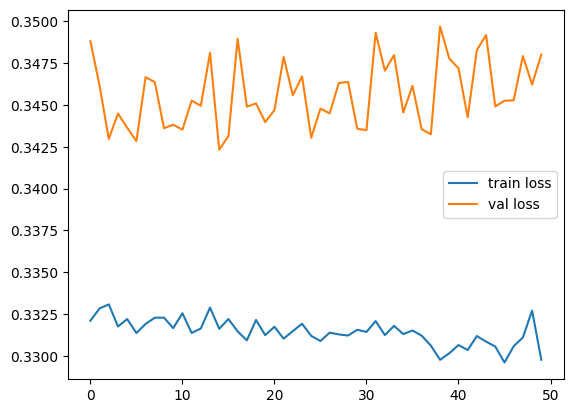

In [124]:
plt.plot(history.history['loss'],label='train loss')
plt.plot(history.history['val_loss'],label='val loss')
plt.legend()
plt.show()

In [121]:
history.history

{'Accuracy': [0.8620312213897705,
  0.8639062643051147,
  0.86328125,
  0.8628125190734863,
  0.8614062666893005,
  0.8650000095367432,
  0.8639062643051147,
  0.8620312213897705,
  0.8628125190734863,
  0.8610937595367432,
  0.8634374737739563,
  0.8629687428474426,
  0.8623437285423279,
  0.8635937571525574,
  0.8604687452316284,
  0.8643749952316284,
  0.862500011920929,
  0.8618749976158142,
  0.8634374737739563,
  0.8631250262260437,
  0.8646875023841858,
  0.86328125,
  0.8629687428474426,
  0.8635937571525574,
  0.8635937571525574,
  0.8621875047683716,
  0.8623437285423279,
  0.86328125,
  0.8634374737739563,
  0.8629687428474426,
  0.8639062643051147,
  0.8642187714576721,
  0.8646875023841858,
  0.8648437261581421,
  0.8646875023841858,
  0.8643749952316284,
  0.8626562356948853,
  0.8637499809265137,
  0.864062488079071,
  0.8626562356948853,
  0.8646875023841858,
  0.8648437261581421,
  0.8651562333106995,
  0.8634374737739563,
  0.8629687428474426,
  0.8654687404632568,
  

In [125]:
# prompt: calculate the accuracy

y_pred = model.predict(X_test_scaled)
y_pred = (y_pred >= 0.5)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


0.86

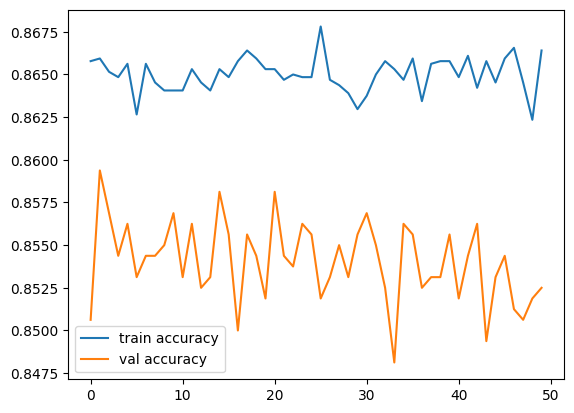

In [126]:
# prompt: create the accuracy graph

plt.plot(history.history['Accuracy'], label='train accuracy')
plt.plot(history.history['val_Accuracy'], label='val accuracy')
plt.legend()
plt.show()